In [2]:
from __future__ import annotations
__authors__: str = 'Tanya' 

### _Project Topic_: 
        ...

### _Project Abstract_: 
        ...

### _Project Introduction_:
        ...

### _Project methodology_:
        ...

In [3]:
# Python imports 
from typing import Any, NewType, Optional, Generator
import os, warnings
warnings.filterwarnings(action= 'ignore')


# Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


# Scripting ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# DL
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader


# Torch Typing Scripts
_path = NewType('_path', Any)
_transform = NewType('_transform', Any)
_text = NewType('_text', Any)
_plot = NewType('_plot', Any)
_criterion = NewType("_criterion", Any)
_optimizor = NewType("_optimizer", Any)
_loss = NewType("_loss", Any)
_layer = NewType("_layer", Any)
_activation = NewType("_activation", Any)
_loader = NewType("_loader", Any)
_recurse = NewType("_recurse", Any)


## _Class DataSet_

In [6]:
class CropData:
    def __init__(self, path: _path, target: Optional[str] = None) -> None:
        self.dataset: pd.DataFrame = pd.read_csv(path, sep= ',')
        if target:
            self.X: pd.DataFrame = self.dataset.drop(target, inplace= False)
            self.y: pd.DataFrame = self.dataset[target] 


    def __repr__(self) -> str(dict[str, str]):
        return str({
            item: value for item, value in zip(['Module', 'Name', 'ObjectID'], 
                                               [self.__module__, type(self).__name__, hex(id(self))])
        })

    
    __str__ = __repr__
        
    
    def __len__(self) -> int:
        return self.dataset.shape[0]
    

    def __getitem__(self, index: int) -> pd.Series:
        return self.dataset.iloc[index]

## _Class Data-Analysis_

In [7]:
class CropAnalysis:
    def __repr__(self) -> str(dict[str, str]):
        return str({
            item: value for item, value in zip(['Module', 'Name', 'ObjectID'], 
                                               [self.__module__, type(self).__name__, hex(id(self))])
        })


    __str__ = __repr__


    @classmethod
    def rename_columns(cls, dataset: pd.DataFrame) -> pd.DataFrame:
        col_dict: dict[str, str] = {
            'Crop': 'crop', 
            'N': 'Nitrogen',
            'P': 'Phosphorus',
            'K': 'Potassium',
            'temperature': 'Temp',
            'humidity': 'humidity', 
            'ph': 'PH',
            'rainfall': 'Rain' 
        }
        dataset.rename(columns= col_dict, inplace=True)
        return dataset


    @classmethod
    def data_characteristics(cls, dataset: pd.DataFrame, 
                                  info: Optional[bool] = False,
                                  summary: Optional[bool] = False) -> Generator[Any, None, None]:
        yield f'Dataset Shape: {dataset.shape}'
        yield f'Dataset features: {dataset.columns.values}'
        if info:
            yield f'Dataset Info: {dataset.info()}'
        yield f'Dataset types:\n{dataset.dtypes}'
        if summary:
            yield dataset.describe().T
        yield f'Null Values in Dataset:\n{dataset.isnull().sum()}'    
    

    
    @classmethod
    def data_unique_values(cls, dataset: pd.DataFrame) -> Generator[_text, None, None]:
        for column in dataset.columns:
            yield f'Unique Value in {column} :\n{dataset[column].unique()}'

    

    @classmethod
    def target_classification_count(cls, dataset: pd.DataFrame, target: str) -> pd.Series:
        yield f'Total count of the Prediction column :\n{dataset[target].value_counts()}'



    @classmethod
    def histograms_numeric_features(cls, dataset: pd.DataFrame, numeric_features: list[str]) -> _plot:
        dataset.hist(numeric_features, figsize = (15, 8))
        plt.show()

## _Class Data-Preprocess_

In [8]:
class CropPreprocess:
    def __repr__(self) -> str(dict[str, str]):
        return str({
            item: value for item, value in zip(['Module', 'Name', 'ObjectID'], 
                                               [self.__module__, type(self).__name__, hex(id(self))])
        })


    __str__ = __repr__


    @classmethod
    def change_object_to_str(cls, dataset: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
        for col in cols:
            dataset[col] = dataset[col].astype(str)
        return dataset


    @classmethod
    def encode_features(cls, dataset: pd.DataFrame) -> pd.DataFrame:
        crop_features: list[str] = [
            'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean',
            'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon',
            'muskmelon', 'apple',  'orange',  'papaya',    'coconut', 'cotton', 'jute', 'coffee'
        ]
        crop_dict: dict[str, int] = {
            crop: index for index, crop in enumerate(crop_features)
        }

        dataset['crop'] = dataset['crop'].replace(to_replace= crop_dict)
        return dataset


## _Class Traditional Machine Learning_

In [9]:
class Traditional_Models:
    def __repr__(self) -> str(dict[str, str]):
        return str({
            item: value for item, value in zip(['Module', 'Name', 'ObjectID'],
                                               [self.__module__, type(self).__name__, hex(id(self))])
        })



    __str__ = __repr__



    @classmethod
    def metric(cls, y_test: pd.Series, y_pred: pd.Series) -> _plot:
        cm: _plot = confusion_matrix(y_test, y_pred)
        group_names: list[str] = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
        group_counts: list = [
            '{0:0.0f}'.format(value) for value in cm.flatten()
        ]
        group_percentages: list = [
            "{0:.2%}".format(value) 
            for value in cm.flatten() / np.sum(cm)
        ]
        labels: list = [
            f"{v1}\n{v2}\n{v3}" 
            for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
        ]

        labels: np.ndarray = np.asarray(labels).reshape(2, 2)
        sns.heatmap(cm, cmap= 'Blues') #annot= labels, fmt= '')
        plt.show()
        return classification_report(y_test, y_pred, )



    @classmethod
    def SupportVectorMachines(cls, x_train: pd.DataFrame, y_train: pd.Series, 
                                    x_test: pd.DataFrame, y_test: pd.Series) -> Generator[Any, None, None]:
        
        params: dict[str, list] = {
            'C'     : [0.1, 1, 10, 100, 1000],
            'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']
        }
        model: _model = SVC()
        model: _model = GridSearchCV(estimator= model, param_grid= params, cv= 5)
        model.fit(x_train, y_train)
        yield f'Tunned Params : {model.best_params_}'
        yield f'Best Score in Training Dataset : {model.best_score_}'

        y_pred = model.predict(x_test)
        accuracy: float = accuracy_score(y_test, y_pred)
        yield f'Accuracy of the Model : {accuracy}'
        yield {'Accuracy': accuracy}
        yield cls.metric(y_test, y_pred)
        


    @classmethod
    def DecisionTrees(cls, x_train: pd.DataFrame, y_train: pd.Series,
                           x_test: pd.DataFrame,  y_test: pd.Series) -> Generator[Any, None, None]:
        params: dict[str, list] = {
            'max_depth': [4, 6, 8, 10, 12],
            'criterion': ['gini', 'entropy'],
            'min_samples_split': [2, 10, 20, 30, 40],
            'max_features': [0.2, 0.4, 0.6, 0.8, 1],
            'max_leaf_nodes': [8, 16, 32, 64, 128],
            'class_weight': [{0: 1, 1: 1}, 
                             {0: 1, 1: 2}, 
                             {0: 1, 1: 3}, 
                             {0: 1, 1: 4}, 
                             {0: 1, 1: 5}]
        }

        model: _model = GridSearchCV(estimator=  DecisionTreeClassifier(), 
                                     param_grid= params,
                                     cv = 5)

        model = model.fit(x_train, y_train)
        yield f'Tunned Params : {model.best_params_}'
        yield f'Best Score in Training Dataset : {model.best_score_}'
        
        y_pred = model.predict(x_test)
        accuracy: float = accuracy_score(y_test, y_pred)
        yield f'Accuracy of the Model : {accuracy}'
        yield {'Accuracy': accuracy}
        yield cls.metric(y_test, y_pred)
        



    @classmethod
    def RandomForest(cls, x_train: pd.DataFrame, y_train: pd.Series, 
                          x_test: pd.DataFrame, y_test: pd.Series) -> Generator[Any, None, None]:
        # param: dict[str, np.ndarray] = {
        #     'n_estimators': np.arange(2, 300, 2),
        #     'max_depth': np.arange(1, 28, 1),
        #     'min_samples_split': np.arange(1,150,1),
        #     'min_samples_leaf': np.arange(1,60,1),
        #     'max_leaf_nodes': np.arange(2,60,1),
        # }

        # model: _model = GridSearchCV(estimator=  RandomForestClassifier(), 
        #                                 param_grid= param,
        #                             )
        model: _model = RandomForestClassifier()

        model: _model = model.fit(x_train, y_train)
        #yield f'Tunned Params : {model.best_params_}'
        #yield f'Best Score in Training Dataset : {model.best_score_}'
        
        y_pred = model.predict(x_test)
        accuracy: float = accuracy_score(y_test, y_pred)
        yield f'Accuracy of the Model : {accuracy}'
        yield {'Accuracy': accuracy}
        yield cls.metric(y_test, y_pred)


## _Class NN_DataSet_

In [64]:
class NN_Dataset(Dataset):
    def __init__(self, X: pd.DataFrame, y: pd.DataFrame) -> None:
        self.X: np.ndarray = X.values
        self.y: np.ndarray = y.values


    def __repr__(self) -> str(dict[str, str]):
        return str({item: value for item, value in zip(['Module', 'Name', 'ObjectID'],
                                                       [self.__module__, type(self).__name__, hex(id(self))])
        })


    __str__ = __repr__


    def __len__(self) -> int:
        return len(self.X)


    def __getitem__(self, index: int) -> tuple:
        return self.X[index], self.y[index]



## _Classes FeedForward Neural Net_ 

In [99]:
#@: Net_params
class Net_Hyperparams:
    #@: params
    epochs: int = 200
    optimizer: _optimizor = torch.optim.Adadelta
    learning_rate: float = 0.01
    criterion: _criterion = nn.CrossEntropyLoss()

    #@: layers
    linear_1: _layer = nn.Linear
    linear_2: _layer = nn.Linear
    linear_3: _layer = nn.Linear
    linear_4: _layer = nn.Linear
    linear_5: _layer = nn.Linear
    linear_6: _layer = nn.Linear

    #@: Activation function
    relu: _activation = nn.ReLU()
    tanh: _activation = nn.Tanh()




#@: NN Model
class Feed_forward_Net(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int) -> None:
        super(Feed_forward_Net, self).__init__()
        
        self.linear_Matrix = nn.Sequential(
            Net_Hyperparams.linear_1(input_dim, hidden_dim),
            Net_Hyperparams.relu,

            Net_Hyperparams.linear_2(hidden_dim, hidden_dim),
            Net_Hyperparams.relu,

            Net_Hyperparams.linear_3(hidden_dim, hidden_dim),
            Net_Hyperparams.relu, 

            Net_Hyperparams.linear_4(hidden_dim, hidden_dim),
            Net_Hyperparams.relu,

            Net_Hyperparams.linear_5(hidden_dim, hidden_dim),
            Net_Hyperparams.relu,
            
            Net_Hyperparams.linear_6(hidden_dim, output_dim),
           
        )
        

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_Matrix(x)

     


#@: Train-validation
class Train_validate:
    def __init__(self, model: _model, train_loader: _loader, 
                                      test_loader: _loader, 
                                      criterion: _criterion,
                                      optimizer: _optimizor ) -> None:
        self.model = model
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.criterion = criterion
        self.optimizer = optimizer 
    
    

    def __repr__(self) -> str(dict[str, str]):
        return str({
            item: value for item, value in zip(['Module', 'Name', 'ObjectID'], [self.__module__, type(self).__name__, hex(id(self))])
        })


    __str__ = __repr__



    @classmethod
    def train_epoch(cls, model: _model, dataloader: _loader, 
                         optimizer: _optimizor, criterion: _criterion) -> tuple[float, float]:
        model.train()
        total_correct: int = 0
        total_loss: float = 0.0
        total_examples: int = 0
        
        for index, data in enumerate(dataloader):
            X, y = data
            y_hat = model(X.float())
            loss = criterion(y_hat, y.long())
            
            #@: back propogation
            model.zero_grad()
            loss.backward()
            optimizer.step()
            #@: end back propogation

            total_examples += y.size(0)
            total_loss += loss.item()
            total_correct += (torch.argmax(y_hat, 1) == y).sum().item()

        return total_loss / len(dataloader), total_correct / total_examples 

        


    @classmethod
    def test_epoch(cls, model: _model, dataloader: _loader, criterion: _criterion) -> tuple[float, float]:
        model.eval()
        total_correct: int = 0
        total_examples: int = 0
        total_loss: float = 0.0
        
        for index, data in enumerate(dataloader):
            X, y = data
            y_hat = model(X.float())
            loss = criterion(y_hat, y.long())

            total_examples += y.size(0)
            total_loss += loss.item()
            total_correct += (torch.argmax(y_hat, 1) == y).sum().item()

        return total_loss / len(dataloader), total_correct / total_examples




    def fit(self, epochs: int) -> _text:
        total_train_accuracy: list[float] = []
        total_test_accuracy: list[float] = []

        for epoch in range(epochs):
            print("------ Epoch {:02d} ------".format(epoch))
            
            #@: training loss + accs
            loss, train_acc = self.train_epoch(model= self.model, dataloader= self.train_loader, optimizer= self.optimizer, criterion= self.criterion)
            total_train_accuracy.append(train_acc)
            print("Train Loss: {:.04f}, Accuracy: {:.04f}".format(loss, train_acc))
            
            #@: testing loss + accs
            loss, test_acc = self.test_epoch(model= self.model, dataloader= self.test_loader, criterion= self.criterion)
            total_test_accuracy.append(test_acc) 
            print("Test  Loss: {:.04f}, Accuracy: {:.04f}".format(loss, test_acc))

        #@: total accuracies:
        print(f'Training Accuracy: {sum(total_train_accuracy) / len(total_train_accuracy)}')
        print(f'Testing Accuracy: {sum(total_test_accuracy) / len(total_test_accuracy)}')



# _DRIVER CODE_

In [13]:
crop: object = CropData(path= 'C:\\Users\\Lenovo\\OneDrive\\Desktop\\tanya\\Crop_Dataset (1).csv')
crop.dataset

,Crop,N,P,K,temperature,humidity,ph,rainfall
0,rice,90,42,43,20.879744,82.002744,6.502985,202.935536
1,rice,85,58,41,21.770462,80.319644,7.038096,226.655537
2,rice,60,55,44,23.004459,82.320763,7.840207,263.964248
3,rice,74,35,40,26.491096,80.158363,6.980401,242.864034
4,rice,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...,...
2195,coffee,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,coffee,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,coffee,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,coffee,117,32,34,26.272418,52.127394,6.758793,127.175293


In [14]:
crop.dataset: pd.DataFrame = CropAnalysis.rename_columns(dataset= crop.dataset)
crop.dataset

,crop,Nitrogen,Phosphorus,Potassium,Temp,humidity,PH,Rain
0,rice,90,42,43,20.879744,82.002744,6.502985,202.935536
1,rice,85,58,41,21.770462,80.319644,7.038096,226.655537
2,rice,60,55,44,23.004459,82.320763,7.840207,263.964248
3,rice,74,35,40,26.491096,80.158363,6.980401,242.864034
4,rice,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...,...
2195,coffee,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,coffee,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,coffee,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,coffee,117,32,34,26.272418,52.127394,6.758793,127.175293


In [15]:
data_generator: Generator = CropAnalysis.data_characteristics(dataset= crop.dataset, 
                                                              info= True, 
                                                              summary= True)

while True:
    try:
        print('-'*100)
        print(data_generator.__next__())
    except StopIteration: break

----------------------------------------------------------------------------------------------------
Dataset Shape: (2200, 8)
----------------------------------------------------------------------------------------------------
Dataset features: ['crop' 'Nitrogen' 'Phosphorus' 'Potassium' 'Temp' 'humidity' 'PH' 'Rain']
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   crop        2200 non-null   object 
 1   Nitrogen    2200 non-null   int64  
 2   Phosphorus  2200 non-null   int64  
 3   Potassium   2200 non-null   int64  
 4   Temp        2200 non-null   float64
 5   humidity    2200 non-null   float64
 6   PH          2200 non-null   float64
 7   Rain        2200 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

In [16]:
unique_values: Generator = CropAnalysis.data_unique_values(dataset= crop.dataset)

while True:
    try:
        print('-'*100)
        print(unique_values.__next__())
    except StopIteration: break

----------------------------------------------------------------------------------------------------
Unique Value in crop :
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
----------------------------------------------------------------------------------------------------
Unique Value in Nitrogen :
[ 90  85  60  74  78  69  94  89  68  91  93  77  88  76  67  83  98  66
  97  84  73  92  95  99  63  62  64  82  79  65  75  71  72  70  86  61
  81  80 100  87  96  40  23  39  22  36  32  58  59  42  28  43  27  50
  25  31  26  54  57  49  46  38  35  52  44  24  29  20  56  37  51  41
  34  30  33  47  53  45  48  13   2  17  12   6  10  19  11  18  21  16
   9   1   7   8   0   3   4   5  14  15  55 105 108 118 101 106 109 117
 114 110 112 111 102 116 119 107 104 103 120 113 115 133 136 126 121 129
 122 140 

In [17]:
target_count: Generator = CropAnalysis.target_classification_count(dataset= crop.dataset, 
                                                                   target= 'crop')

while True:
    try:
        print('-'*100)
        print(target_count.__next__())
    except StopIteration: break

----------------------------------------------------------------------------------------------------
Total count of the Prediction column :
mango          100
cotton         100
papaya         100
pomegranate    100
apple          100
grapes         100
lentil         100
mungbean       100
pigeonpeas     100
banana         100
mothbeans      100
coffee         100
coconut        100
blackgram      100
kidneybeans    100
jute           100
muskmelon      100
chickpea       100
rice           100
orange         100
maize          100
watermelon     100
Name: crop, dtype: int64
----------------------------------------------------------------------------------------------------


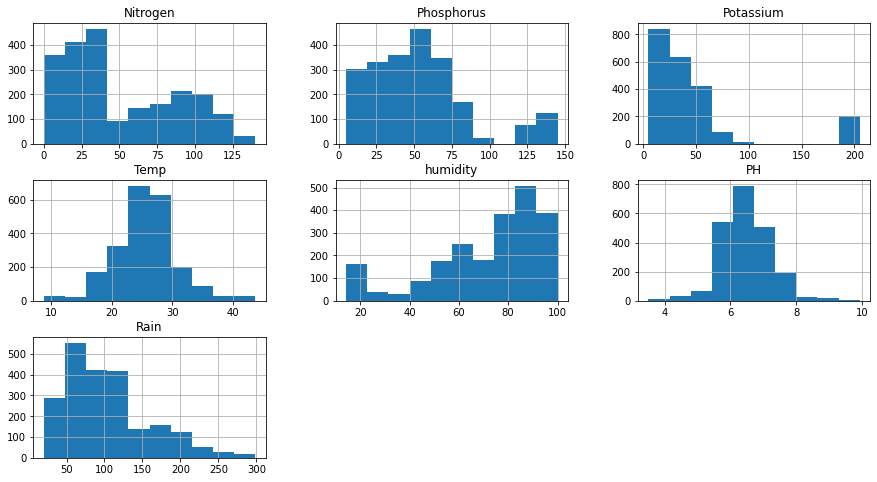

In [18]:
numeric_plot: _plot = CropAnalysis.histograms_numeric_features(dataset= crop.dataset, 
                                                               numeric_features= [
                                     'Nitrogen', 'Phosphorus', 'Potassium',	
                                     'Temp',	'humidity',
                                     'PH',      'Rain'
                                    ]
                                )

In [19]:
crop.dataset: pd.DataFrame = CropPreprocess.change_object_to_str(dataset= crop.dataset, 
                                                                cols= [
                                                                    'crop'
                                                                ])
crop.dataset

,crop,Nitrogen,Phosphorus,Potassium,Temp,humidity,PH,Rain
0,rice,90,42,43,20.879744,82.002744,6.502985,202.935536
1,rice,85,58,41,21.770462,80.319644,7.038096,226.655537
2,rice,60,55,44,23.004459,82.320763,7.840207,263.964248
3,rice,74,35,40,26.491096,80.158363,6.980401,242.864034
4,rice,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...,...
2195,coffee,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,coffee,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,coffee,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,coffee,117,32,34,26.272418,52.127394,6.758793,127.175293


In [20]:
crop.dataset = CropPreprocess.encode_features(dataset= crop.dataset)
crop.dataset

,crop,Nitrogen,Phosphorus,Potassium,Temp,humidity,PH,Rain
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,0,85,58,41,21.770462,80.319644,7.038096,226.655537
2,0,60,55,44,23.004459,82.320763,7.840207,263.964248
3,0,74,35,40,26.491096,80.158363,6.980401,242.864034
4,0,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...,...
2195,21,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,21,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,21,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,21,117,32,34,26.272418,52.127394,6.758793,127.175293


In [24]:
X: pd.DataFrame = crop.dataset.drop('crop', axis= 1)
y: pd.DataFrame = crop.dataset['crop']

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size= 0.20, 
                                                    random_state= 7)



<class 'pandas.core.frame.DataFrame'>


Tunned Params : {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Score in Training Dataset : 0.9869318181818182
Accuracy of the Model : 0.9886363636363636


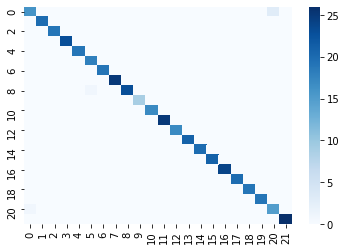

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        19
           5       0.95      1.00      0.97        18
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        25
           8       1.00      0.96      0.98        24
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        24
          17       1.00    

In [18]:
accuracies: list[float] = []

support_vector_machines: Generator = Traditional_Models.SupportVectorMachines(x_train, y_train, 
                                                                              x_test, y_test)
while True:
    try:
        item = support_vector_machines.__next__()
        if isinstance(item, dict):
            accuracies.append(item['Accuracy'])
        else:
            print(item)
    except StopIteration: break

Tunned Params : {'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 12, 'max_features': 0.8, 'max_leaf_nodes': 128, 'min_samples_split': 20}
Best Score in Training Dataset : 0.9886363636363635
Accuracy of the Model : 0.9431818181818182


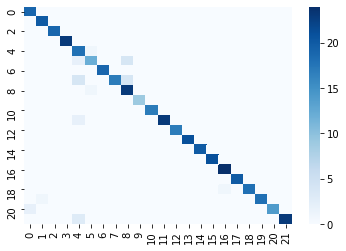

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        23
           4       0.62      0.95      0.75        19
           5       0.86      0.67      0.75        18
           6       1.00      1.00      1.00        19
           7       1.00      0.68      0.81        25
           8       0.74      0.96      0.84        24
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        17
          11       1.00      0.92      0.96        25
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        21
          16       0.96      1.00      0.98        24
          17       1.00    

In [19]:
decision_trees: Generator = Traditional_Models.DecisionTrees(x_train, y_train, 
                                                             x_test, y_test)
while True:
    try:
        item = decision_trees.__next__()
        if isinstance(item, dict):
            accuracies.append(item['Accuracy'])
        else:
            print(item)
    except StopIteration: break

Accuracy of the Model : 0.9954545454545455


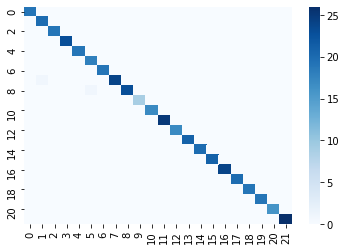

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        19
           5       0.95      1.00      0.97        18
           6       1.00      1.00      1.00        19
           7       1.00      0.96      0.98        25
           8       1.00      0.96      0.98        24
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        24
          17       1.00    

In [22]:
random_forest: Generator = Traditional_Models.RandomForest(x_train, y_train, 
                                                           x_test, y_test)
while True:
    try:
        item = random_forest.__next__()
        if isinstance(item, dict):
            accuracies.append(item['Accuracy'])
        else:
            print(item)
    except StopIteration: break

In [92]:
forward_net: _model = Feed_forward_Net(7, 100, 22)
print(forward_net)

Feed_forward_Net(
  (linear_Matrix): Sequential(
    (0): Linear(in_features=7, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU()
    (10): Linear(in_features=100, out_features=22, bias=True)
  )
)


In [100]:
#@: NN_Data
training_data: object = NN_Dataset(X= x_train , y= y_train)
testing_data: object = NN_Dataset(X= x_test, y= y_test)

#@: loaders
train_loader: _loader = DataLoader(dataset= training_data, batch_size= 16, shuffle= True)
test_loader: _loader = DataLoader(dataset= testing_data, batch_size= 16, shuffle= True)


train_validate: object = Train_validate(model= forward_net, 
                                        train_loader= train_loader, 
                                        test_loader= test_loader, 
                                        criterion= Net_Hyperparams.criterion, 
                                        optimizer= Net_Hyperparams.optimizer(forward_net.parameters(), lr= Net_Hyperparams.learning_rate))

train_validate.fit(Net_Hyperparams.epochs)

------ Epoch 00 ------
Train Loss: 0.0636, Accuracy: 0.9739
Test  Loss: 0.0953, Accuracy: 0.9636
------ Epoch 01 ------
Train Loss: 0.0622, Accuracy: 0.9773
Test  Loss: 0.0922, Accuracy: 0.9682
------ Epoch 02 ------
Train Loss: 0.0617, Accuracy: 0.9778
Test  Loss: 0.0976, Accuracy: 0.9659
------ Epoch 03 ------
Train Loss: 0.0618, Accuracy: 0.9790
Test  Loss: 0.0864, Accuracy: 0.9682
------ Epoch 04 ------
Train Loss: 0.0622, Accuracy: 0.9739
Test  Loss: 0.0945, Accuracy: 0.9636
------ Epoch 05 ------
Train Loss: 0.0636, Accuracy: 0.9744
Test  Loss: 0.0832, Accuracy: 0.9750
------ Epoch 06 ------
Train Loss: 0.0621, Accuracy: 0.9722
Test  Loss: 0.0847, Accuracy: 0.9727
------ Epoch 07 ------
Train Loss: 0.0645, Accuracy: 0.9722
Test  Loss: 0.0868, Accuracy: 0.9750
------ Epoch 08 ------
Train Loss: 0.0612, Accuracy: 0.9750
Test  Loss: 0.0923, Accuracy: 0.9773
------ Epoch 09 ------
Train Loss: 0.0632, Accuracy: 0.9750
Test  Loss: 0.0831, Accuracy: 0.9705
------ Epoch 10 ------
Train L

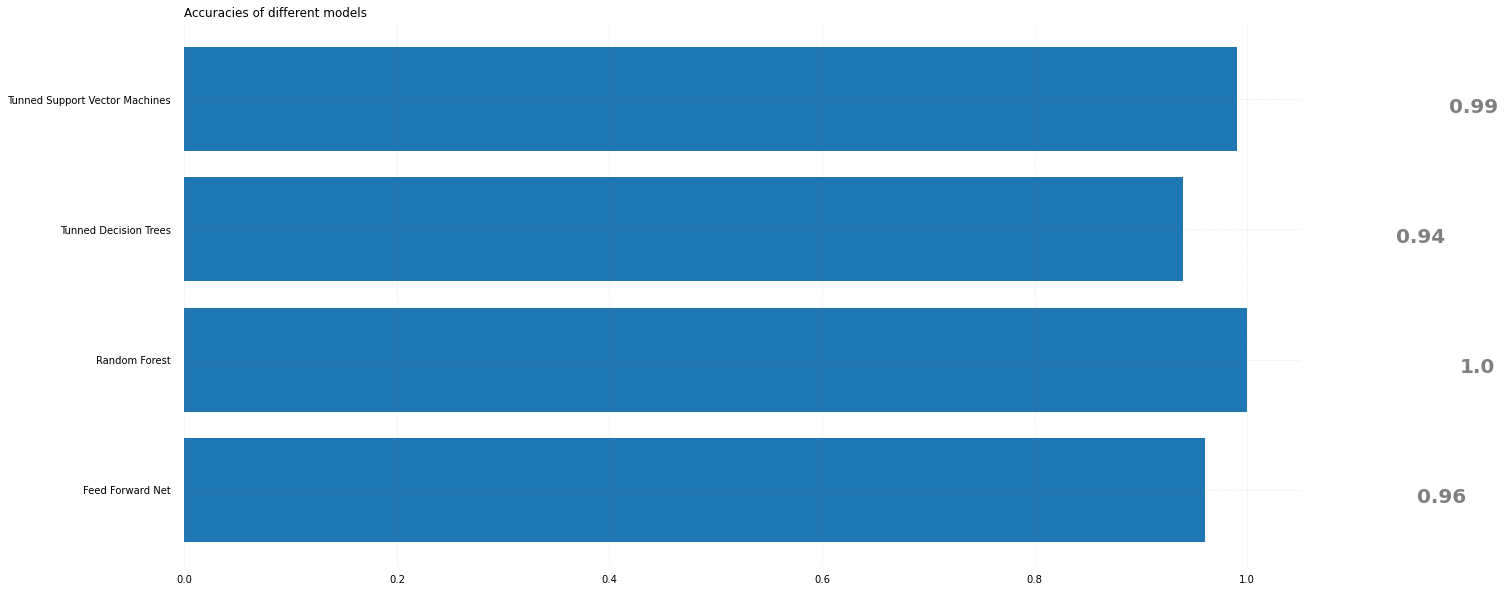

In [107]:
def model_accuracies_plot(model: list[str], accuracies: list[float]) -> _plot:
    fig, ax = plt.subplots(figsize= (20, 10))
    ax.barh(model, accuracies)
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
 
    ax.xaxis.set_tick_params(pad = 5) 
    ax.yaxis.set_tick_params(pad = 10)  
        
    ax.grid(b = True, 
            color ='grey', 
            linestyle ='-.', 
            linewidth = 0.5, 
            alpha = 0.2) 
 
    ax.invert_yaxis() 

    for i in ax.patches: 
        plt.text(
            i.get_width() + 0.2, 
            i.get_y() + 0.5, 
            str(round((i.get_width()), 2)), 
            fontsize = 20, 
            fontweight ='bold', 
            color ='grey'
        ) 

    ax.set_title('Accuracies of different models', 
                      loc ='left') 
    plt.show()



#@: Driver Code
if __name__.__contains__('__main__'):
    model_acc_dict: dict[str, float] = {
        'Tunned Support Vector Machines': 0.99, 
        'Tunned Decision Trees': 0.94, 
        'Random Forest': 1.00,
        'Feed Forward Net': 0.96
    }
    
    model_accuracies_plot(model= list(model_acc_dict.keys()),
                          accuracies= list(model_acc_dict.values()))